In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [57]:
### get the dimensions of the run
'''
I'm not sure what the first 5 things are, but
we only need:
nt : number of outputs
ny : radial number of zones
nx : asimuthal number of zones
'''
with open('dims.dat','r') as f:
    dum1,dum2,dum3,dum4,dum5,nt,ny,nx = f.readline().split()
    # these three should be ints
    nt,ny,nx = list(map(int,[nt,ny,nx]))
print(nx,ny,nt)

384 128 50


In [58]:
### Read the x and y domain values
'''
This could be done by reading in domain_x.dat
and domain_y.dat, but we can hack it for linearly spaced
azimuthal x
'''
az_grid = np.linspace(-np.pi,np.pi,nx)
ra_grid = np.zeros(ny)
with open('used_rad.dat','r') as f:
    for i in range(ny):
        rad = float(f.readline())
        ra_grid[i] = rad
print(az_grid.shape)
print(ra_grid.shape)

theta,rad = np.meshgrid(az_grid,ra_grid)

(384,)
(128,)


In [59]:
# get the density profile from the last output
rho = np.fromfile('gasdens10.dat').reshape(ny,nx)
log_rho = np.log10(rho)

<ipython-input-60-a591a401a67d>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(theta,rad,log_rho)


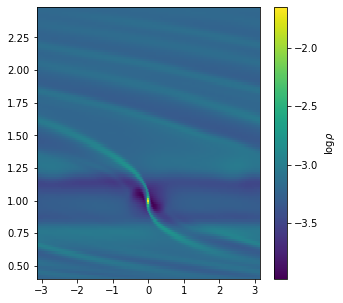

In [60]:
# plot up the data in az,rad space
fig,ax = plt.subplots(figsize=(5,5))
# im = ax.imshow(log_rho,origin='lower',aspect='auto')
im = ax.pcolormesh(theta,rad,log_rho)
cb = fig.colorbar(im,label=r'$\log \rho$')

plt.show()

<ipython-input-61-4bb109b82ee0>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pim = ax.pcolormesh(theta,rad,log_rho)


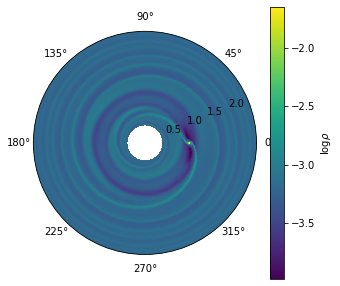

In [61]:
# make it polar!

fig,ax = plt.subplots(figsize=(5,5),subplot_kw=dict(projection="polar"))
pim = ax.pcolormesh(theta,rad,log_rho)
pcb = fig.colorbar(pim,label=r'$\log \rho$')
plt.show()

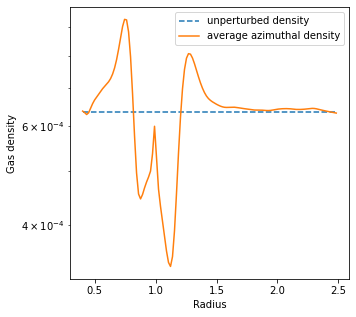

In [62]:
# get azimuthal averages
rho_avg = np.mean(rho,axis=1) # axis=1 is mean over a given radius
fig,ax = plt.subplots(figsize=(5,5))
ax.plot(ra_grid,[6.3661977237e-4]*ra_grid.size,ls='--',label='unperturbed density')
ax.plot(ra_grid,rho_avg,label='average azimuthal density')
ax.set(xlabel='Radius',ylabel='Gas density',yscale='log')
ax.legend()

In [65]:
temp_dir = 'pngs'
for t in range(nt+1):
    if t%5 == 0:
        print(t)
    rho = np.fromfile(f'gasdens{t}.dat').reshape(ny,nx)
    log_rho = np.log10(rho)
    # plot up the data in az,rad space
    fig,ax = plt.subplots(figsize=(5,5))
    # im = ax.imshow(log_rho,origin='lower',aspect='auto')
    im = ax.pcolormesh(theta,rad,log_rho,vmin=-4,vmax=-1.5,shading='auto')
    cb = fig.colorbar(im,label=r'$\log \rho$')

    plt.savefig(f'{temp_dir}/gas_dens_{t:0>2}.png')
    plt.close()
    
    # get azimuthal averages
    rho_avg = np.mean(rho,axis=1) # axis=1 is mean over a given radius
    fig,ax = plt.subplots(figsize=(5,5))
    ax.plot(ra_grid,[6.3661977237e-4]*ra_grid.size,ls='--',label='unperturbed density')
    ax.plot(ra_grid,rho_avg,label='average azimuthal density')
    ax.set(xlabel='Radius',ylabel='Gas density',yscale='log',ylim=(5e-5,1e-3))
    ax.legend()
    plt.savefig(f'{temp_dir}/avg_rho_{t:0>2}.png')
    plt.close()
    
    
    fig,ax = plt.subplots(figsize=(5,5),subplot_kw=dict(projection="polar"))
    pim = ax.pcolormesh(theta,rad,log_rho,vmin=-4,vmax=-1.5,shading='auto')
    pcb = fig.colorbar(pim,label=r'$\log \rho$')
    plt.savefig(f'{temp_dir}/polar_gas_dens_{t:0>2}.png')
    plt.close()

0
5
10
15
20
25
30
35
40
45
50
